<a href="https://colab.research.google.com/github/lhwong/airbnb-analytics/blob/main/paidout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Paid Out Amount:  28308.949999999997
Listing
L    12270.96
R    16037.99
Name: Amount, dtype: float64
Listing  Date
L        4        153.75
         5       2659.01
         6       4125.42
         7       4307.60
         8       1025.18
R        4        474.03
         5       4847.01
         6       5059.28
         7       4490.33
         8       1167.34
Name: Amount, dtype: float64


<Axes: xlabel='Date'>

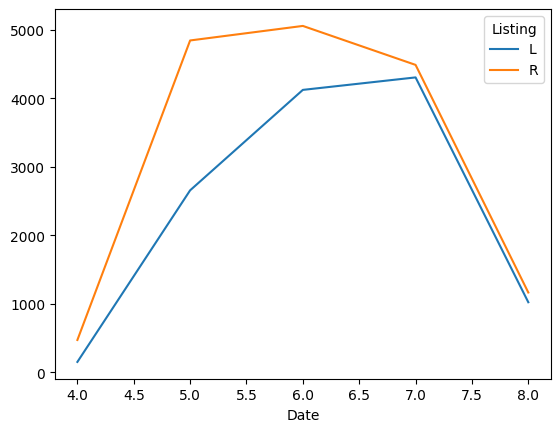

In [19]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt


#uploaded = files.upload()


#df2 = pd.read_csv(io.BytesIO(uploaded['airbnb_tax_01_2023-08_2023.csv']), parse_dates=['Date', 'Start Date'])

df2 = pd.read_csv('airbnb_tax_01_2023-08_2023.csv', parse_dates=['Date', 'Start Date'])



df2.loc[df2["Listing"] == "Level35 Ceylonz Suites overlooking KLCC, KL Tower", "Listing"] = 'R'
df2.loc[df2["Listing"] == "Level 35 Ceylonz Suites overlooking KLCC, KL Tower", "Listing"] = 'L'

result = df2.loc[df2['Type'] == "Reservation", 'Amount'].sum()

print("Total Paid Out Amount: ",result)



grouped = df2.loc[(df2['Type'] == "Reservation")].groupby('Listing')['Amount'].sum()

print(grouped)

grouped1 = df2.loc[(df2['Type'] == "Reservation")].groupby(['Listing', df2.Date.dt.month])['Amount'].sum()

print(grouped1)

#df2.set_index(df2.Date.dt.month, inplace=True)

#df2.loc[(df2['Type'] == "Reservation")].groupby('Listing')['Amount'].plot(legend=True)




grouped2 = df2.loc[(df2['Type'] == "Reservation")].groupby([df2.Date.dt.month, 'Listing'])['Amount'].sum()
#.unstack().assign(Total=df2.groupby(df2.Date.dt.month).sum()).stack()

#print(grouped2)





#table = pd.pivot_table(df2, values=['Amount'], index=[df2.Date.dt.month,'Listing'], aggfunc = 'sum')
#table

pd.pivot_table(grouped2.reset_index(),
               index='Date', columns='Listing', values='Amount'
              ).plot(legend=True)


          Date Listing    Earnings
0   2023-04-26       R  105.340000
1   2023-04-27       R  105.340000
2   2023-04-28       R  131.675000
3   2023-04-29       R  131.675000
4   2023-04-29       L  153.750000
5   2023-04-30       R  131.680000
6   2023-04-30       L  151.420000
7   2023-05-01       R  172.337500
8   2023-05-02       R  172.337500
9   2023-05-03       R  172.337500
10  2023-05-04       R  172.337500
11  2023-05-05       R  131.680000
12  2023-05-06       R  172.350000
13  2023-05-06       L  127.412857
14  2023-05-07       L  127.412857
15  2023-05-08       L  127.412857
16  2023-05-09       L  127.412857
17  2023-05-10       L  127.412857
18  2023-05-11       L  127.412857
19  2023-05-12       L  127.412857
20  2023-05-07       R  139.420000
21  2023-05-08       R  139.420000
22  2023-05-09       R  139.420000
23  2023-05-10       R  134.560000
24  2023-05-11       R  172.340000
25  2023-05-12       R  172.340000
28  2023-05-13       L  146.200000
29  2023-05-13      

<Axes: xlabel='Date'>

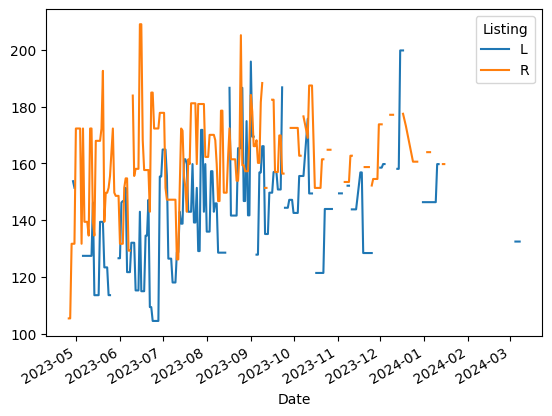

In [42]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import datetime
from re import sub
from decimal import Decimal

#uploaded = files.upload()


df1 = pd.read_csv('reservations1.csv', parse_dates=['Start date', 'End date', 'Booked'])

df2 = pd.read_csv('reservations2.csv', parse_dates=['Start date', 'End date', 'Booked'])

df3 = pd.read_csv('reservations3.csv', parse_dates=['Start date', 'End date', 'Booked'])

df4 = pd.read_csv('reservations4.csv', parse_dates=['Start date', 'End date', 'Booked'])

df5 = pd.read_csv('reservations5.csv', parse_dates=['Start date', 'End date', 'Booked'])

df6 = pd.read_csv('reservations6.csv', parse_dates=['Start date', 'End date', 'Booked'])

frames  = [df1, df2, df3, df4, df5, df6]
df = pd.concat(frames, ignore_index=True)


df.loc[df["Listing"] == "Level35 Ceylonz Suites overlooking KLCC, KL Tower", "Listing"] = 'R'
df.loc[df["Listing"] == "Level 35 Ceylonz Suites overlooking KLCC, KL Tower", "Listing"] = 'L'



df["Earnings"] = df["Earnings"].apply(lambda x: sub(r'[^\d.]', '', x))

df['Earnings'] = df['Earnings'].astype(float)

#df = dfi[dfi['Earnings'] > 0]
#print(df)
#print(df.head(15))

#earnings = df.groupby([df['Start date'].dt.to_period('M'), 'Listing'])['Earnings'].sum()

#print(earnings)

cols = ['Date', 'Listing', 'Earnings']
lst = []
for ind in range(len(df)):
  for y in range(df['# of nights'][ind]) :
    date = df['Start date'][ind] + datetime.timedelta(days=y)
    lst.append([date, df['Listing'][ind], df['Earnings'][ind]/df['# of nights'][ind]])

data = pd.DataFrame(lst, columns=cols)

dataL = data.loc[(data['Earnings'] > 0) & (data['Listing'] == 'L')]


#with pd.option_context('display.max_rows', None):
#  display(dataL)

dataR = data.loc[(data['Earnings'] > 0) & (data['Listing'] == 'R')]


#with pd.option_context('display.max_rows', None):
#  display(dataR)

data = data.loc[(data['Earnings'] > 0)]

with pd.option_context('display.max_rows', None):
   print(data)

#earnings = data.groupby(['Date', 'Listing'])['Earnings'].sum()
#print(earnings)



pd.pivot_table(data.reset_index(),
               index='Date', columns='Listing', values='Earnings'
              ).plot(legend=True)


#for ind in range(len(df)):
#    print(df['Start date'][ind], df['End date'][ind], df['# of nights'][ind])
